# Challenge Data Mauna Kea
Data exploration

In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
train_df = pd.read_csv("../data/raw/TrainingSet_20aimVO.csv")

In [3]:
train_df

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0
5,im_1_0.png,0
6,im_13_0.png,0
7,im_0_0.png,0
8,im_19_0.png,0
9,im_24_0.png,0


In [4]:
len(train_df)

9446

## Classes are imbalanced:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B23449C88>]],
      dtype=object)

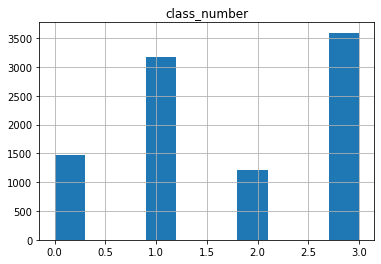

In [5]:
train_df.hist()

## Image sizes:

In [6]:
img_dir = "../data/raw/TrainingSetImagesDir"
img_sizes = []
for img_name in random.sample(os.listdir(img_dir), k=1000):
    img = Image.open(os.path.join(img_dir, img_name))
    img = np.array(img)
    img_sizes.append(img.shape)

In [7]:
img_sizes = np.array(img_sizes)[:, :2]
print(img_sizes.mean(axis=0))
print(img_sizes.std(axis=0))

[519. 521.]
[0. 0.]


## Plot samples:

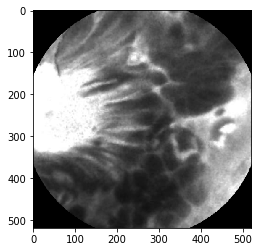

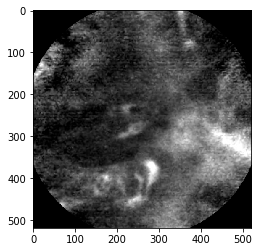

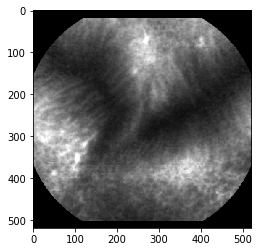

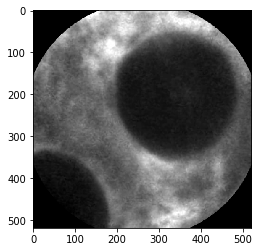

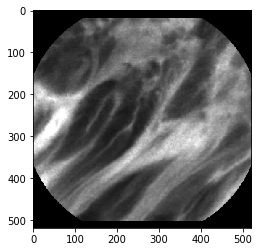

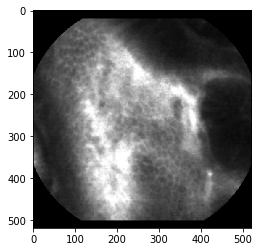

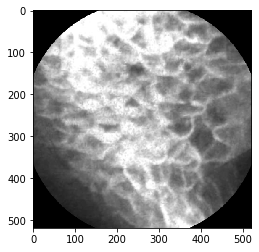

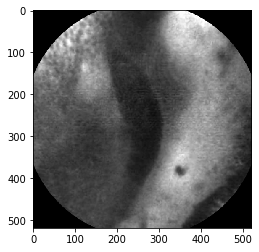

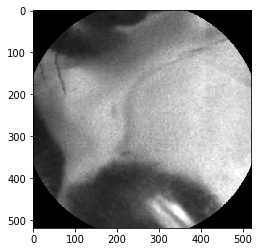

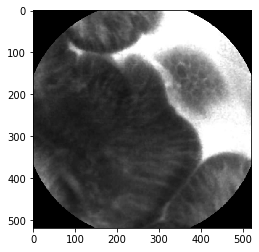

<Figure size 432x288 with 0 Axes>

In [8]:
for img_name in random.sample(os.listdir(img_dir), k=10):
    img = Image.open(os.path.join(img_dir, img_name))
    img = np.array(img)
    plt.imshow(img)
    plt.figure()
plt.show()

## Analyze images per patient

In [9]:
def get_patient_nb(row):
    img_name = row.image_filename
    start = img_name.rfind("_")
    return img_name[start+1:-4]
train_df["patient_id"] = train_df.apply(get_patient_nb, axis=1)
train_df

,image_filename,class_number,patient_id
0,im_4_0.png,0,0
1,im_21_0.png,0,0
2,im_9_0.png,0,0
3,im_8_0.png,0,0
4,im_15_0.png,0,0
5,im_1_0.png,0,0
6,im_13_0.png,0,0
7,im_0_0.png,0,0
8,im_19_0.png,0,0
9,im_24_0.png,0,0


In [10]:
train_df[["class_number", "patient_id"]]

,class_number,patient_id
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


## Find similar images